<a href="https://colab.research.google.com/github/Zac-Azev/ai_2025/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nvlinh99_number_digits_path = kagglehub.dataset_download('nvlinh99/number-digits')

print('Data source import complete.')


100%|██████████| 539/539 [00:00<00:00, 1.22MB/s]

Extracting files...
Data source import complete.


![download.png](attachment:8e41170b-800e-4dd6-b974-d042646b11d8.png)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.4685 - loss: 1.4671 - val_accuracy: 0.9247 - val_loss: 0.2625
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.7130 - loss: 0.7900 - val_accuracy: 0.9222 - val_loss: 0.2370
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.7513 - loss: 0.6783 - val_accuracy: 0.9612 - val_loss: 0.1388
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.7847 - loss: 0.5867 - val_accuracy: 0.9647 - val_loss: 0.1106
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8032 - loss: 0.5433 - val_accuracy: 0.9715 - val_loss: 0.0931
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.8205 - loss: 0.5075 - val_accuracy: 0.9640 - val_loss: 0.1145
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8268 - loss: 0.5013 - val_accuracy: 0.9733 - val_loss: 0.0962
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8418 - loss: 0.46

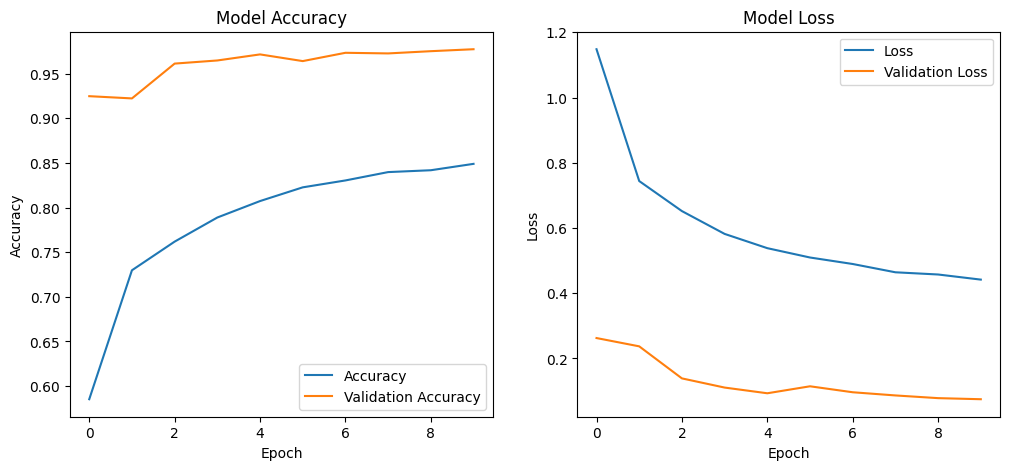

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.95      0.95      0.95       892
           6       0.97      0.98      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 970    0    1    0    1    2    3    1    0    2]
 [   0 1107    3    2   10    0    5    7    1    0]
 [   1    0  995    6    0   10   14    5    1    0]
 [   0    0    4  985    0   16    0    3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Khởi tạo mô hình CNN
model = Sequential([
    # Set n1 = 50 cho lớp Convolution đầu tiên
    Conv2D(50, (5, 5), activation='relu', input_shape=(28, 28, 1), padding='valid'),
    MaxPooling2D((2, 2)),
    # Set n2 = 30 cho lớp Convolution đầu tiên
    Conv2D(30, (5, 5), activation='relu', padding='valid'),
    MaxPooling2D((2, 2)),
    Flatten(),
    # Set n3 = 20 cho lớp Fully-Connected đầu tiên
    Dense(20, activation='relu'),
    Dropout(0.5), # Có thể không dùng
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Data Augmentation
data_gen = ImageDataGenerator(
    rotation_range=20, width_shift_range=0.10, height_shift_range=0.10,
    shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest'
)

# Fit the model
history = model.fit(data_gen.flow(x_train, y_train, batch_size=32),
                    epochs=10, validation_data=(x_test, y_test))

# Plotting the training and validation loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

# Evaluating the model on test set
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

# Classification Report and Confusion Matrix
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Example: Loading and preparing an external image for prediction

def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))  # Resize the image to 28x28 pixels
    img = img.astype('float32') / 255  # Scale pixel values to 0-1
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict_image(model, img):
    pred = model.predict(img)
    pred_digit = np.argmax(pred, axis=1)[0]
    return pred_digit

# Example usage with a sample image
sample_image_path = '/kaggle/input/number-digits/anh6.png'  # Update this path to your specific image
sample_img = load_and_preprocess_image(sample_image_path)
predicted_digit = predict_image(model, sample_img)

# Display the input image and prediction
plt.imshow(sample_img.reshape(28, 28), cmap='gray')  # Reshape to remove batch dimension for display
plt.title(f'Predicted Digit: {predicted_digit}')
plt.axis('off')
plt.show()

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
